<a href="https://colab.research.google.com/github/Dhanush123555/ML_Escapades/blob/main/TitanicEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd

titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<Axes: >

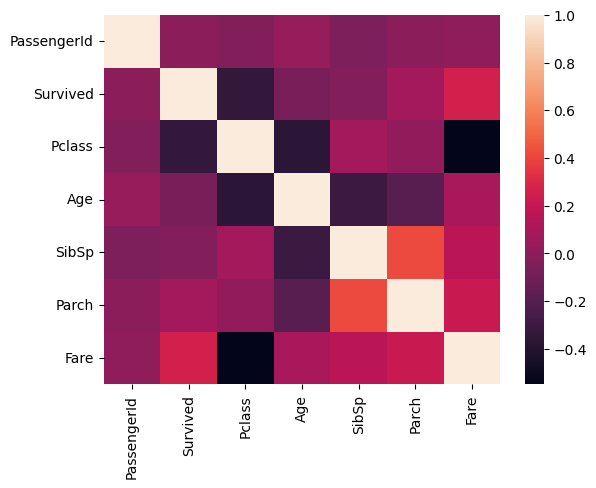

In [ ]:
sns.heatmap(titanic_train.corr(numeric_only = True)) #Visualise the correlation matrix using only the numerical variables
#PassengerId has almost zero correlation.

In [ ]:
# We'll drop Name, PassengerId and Ticket since it doesn't seem like they'll provide any info
titanic_train.info()
#Cabin only has 25% values so useless again.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Now, to remove bias while splitting, we use stratified split on PClass,Embarked and Sex
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)

for train_index, test_index in sss.split(titanic_train[["Pclass","Sex","Embarked"]], titanic_train["Survived"]):
  train_data = titanic_train.iloc[train_index]
  test_data = titanic_train.iloc[test_index]

/tmp/ipython-input-2257358012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Embarked"] = train_data["Embarked"].ffill() # Just to visualise. Rerun the previous block before going on to the next.
/tmp/ipython-input-2257358012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Embarked"] = test_data["Embarked"].ffill()


(array([126.,   0.,   0.,   0.,   0.,  37.,   0.,   0.,   0.,  16.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

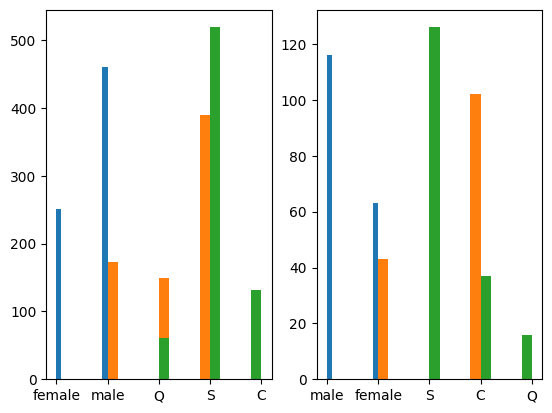

In [ ]:
train_data["Embarked"] = train_data["Embarked"].ffill() # Just to visualise. Rerun the previous block before going on to the next.
test_data["Embarked"] = test_data["Embarked"].ffill()
plt.subplot(1,2,1)
plt.hist(train_data["Sex"])
plt.hist(train_data["Pclass"])
plt.hist(train_data["Embarked"])
plt.subplot(1,2,2)
plt.hist(test_data["Sex"])
plt.hist(test_data["Pclass"])
plt.hist(test_data["Embarked"])
# The proportions seem to hold up nicely

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 502 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
#Now that we have train-test split for model selection, we must create the preprocessing pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# The pipeline is as follows:
# Step 1: Drop PassengerId, Name, Ticket, Cabin
# Step 2: OneHotEncode Sex and Embarked columns.
# Step 3: Fill NaNs in age with mean

class FeatureDropper(BaseEstimator, TransformerMixin):

  def fit(self, X, y = None):
    return self

  def transform(self, X):
    X = X.drop(["PassengerId","Name","Ticket","Cabin"],axis = 1)
    return X



class FeatureEncoder(BaseEstimator, TransformerMixin):

  def fit(self, X, y = None):
    self.enc = OneHotEncoder(handle_unknown = "ignore", drop = "if_binary") #Drop unnecessary column if it's binary
    self.enc.fit(X[["Sex","Embarked"]])
    return self

  def transform(self, X):
    Encoding = self.enc.transform(X[["Sex","Embarked"]]).toarray().T

    for i, category in enumerate(self.enc.get_feature_names_out().tolist()) :
      X[category] = Encoding[i]

    X = X.drop(["Sex","Embarked", "Embarked_nan"], axis = 1) # Embarked_nan seems useless so let's drop it
    return X



class FeatureFiller(BaseEstimator, TransformerMixin):
# Fill NaN values of Age and Fare using mean of the train dataset
# Fill NaN values of others used their respective modes
# This is to ensure there are no NaN values after preprocessing as SVCs do not work on them

  def fit(self, X, y = None):
    self.age = X["Age"].mean()
    self.fare = X["Fare"].mean()
    self.maxes = dict()
    for column in ["Pclass","SibSp","Parch"]:
      self.maxes[column] = X[column].mode()[0]
    return self

  def transform(self, X):

    X["Age"] = X["Age"].fillna(self.age)
    X["Fare"] = X["Fare"].fillna(self.fare)
    for column in ["Pclass","SibSp","Parch"]:
      X[column] = X[column].fillna(self.maxes[column])
    return X



class FeatureScaler(BaseEstimator, TransformerMixin):

  def fit(self, X, y = None):
    self.enc = StandardScaler()
    self.enc.fit(X)
    return self

  def transform(self, X):
    array = self.enc.transform(X)
    X = pd.DataFrame(array, columns = X.columns, index = X.index)
    return X

In [ ]:
# chain the preprocessing pipeline
from sklearn.pipeline import Pipeline

prepipe = Pipeline([('dropper', FeatureDropper()),("encoder", FeatureEncoder()),("filler", FeatureFiller()),("scaler", FeatureScaler())])

df = train_data.drop(["Survived"], axis = 1)

df = prepipe.fit_transform(df)
df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
502,0.834246,0.000000,-0.486935,-0.467659,-0.482061,-1.355232,-0.474840,3.266823,-1.634045
464,0.834246,0.000000,-0.486935,-0.467659,-0.474085,0.737881,-0.474840,-0.306108,0.611978
198,0.834246,0.000000,-0.486935,-0.467659,-0.479771,-1.355232,-0.474840,3.266823,-1.634045
765,-1.560848,1.678536,0.457745,-0.467659,0.850885,-1.355232,-0.474840,-0.306108,0.611978
421,0.834246,-0.660324,-0.486935,-0.467659,-0.480088,0.737881,-0.474840,3.266823,-1.634045
...,...,...,...,...,...,...,...,...,...
131,0.834246,-0.738286,-0.486935,-0.467659,-0.493038,0.737881,-0.474840,-0.306108,0.611978
490,0.834246,0.000000,0.457745,-0.467659,-0.248228,0.737881,-0.474840,-0.306108,0.611978
528,0.834246,0.742992,-0.486935,-0.467659,-0.476454,0.737881,-0.474840,-0.306108,0.611978
48,0.834246,0.000000,1.402425,-0.467659,-0.215771,0.737881,2.105971,-0.306108,-1.634045


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {"kernel" : ["linear", "rbf", "poly"], "degree" : [2, 3, 4], "C" : [0.5, 1, 3, 7, 10]}

svc = svm.SVC()
search = GridSearchCV(svc, parameters,scoring = "accuracy", cv = 4) # around 100-200 per test set in each cross validation. Sounds good enuff.
search.fit(df, train_data["Survived"])

# Seems the best estimator is a polynomial estimator with degree 2 and C = 1
#0.804469

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.5, 1, 3, 7, 10], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators" : [50,100,200], "max_depth" : [4,5,6,7], "min_samples_split" : [2,3,4,5]}

RFC = RandomForestClassifier()
search = GridSearchCV(RFC, parameters, scoring = "accuracy", cv = 4)
search.fit(df, train_data["Survived"])
#0.7988

In [ ]:
from sklearn.tree import DecisionTreeClassifier



search = DecisionTreeClassifier(max_depth = 5)
search.fit(df, train_data["Survived"])
#0.821229

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.naive_bayes import GaussianNB


search = GaussianNB()
search.fit(df, train_data["Survived"])
#0.7932

In [ ]:
from sklearn.linear_model import LogisticRegression

search = LogisticRegression()
search.fit(df, train_data["Survived"])
#0.7821

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = { "alpha" : [1e-4,1e-5,1e-6], "hidden_layer_sizes" : [(15,), (6,), (7,7),(10,5),(8,4)], "learning_rate_init" : [1e-2, 1e-3, 1e-5]}
mlp = MLPClassifier(solver = 'adam', random_state=1)
search = GridSearchCV(mlp,parameters, scoring = 'accuracy', cv = 5)
search.fit(df, train_data["Survived"])
# (10,5) hidden layers
# 0.7988 accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'alpha': [0.0001, 1e-05, 1e-06],
                         'hidden_layer_sizes': [(15,), (6,), (7, 7), (10, 5),
                                                (8, 4)],
                         'learning_rate_init': [0.01, 0.001, 1e-05]},
             scoring='accuracy')

In [ ]:
# Let's convert the pd DF into a pytorch DataLoader
from torch.utils.data import Dataset, DataLoader
import torch

class ConvertDataset(Dataset):

  def __init__(self, features, targets):
    self.X = torch.tensor(features.values, dtype = torch.float32)
    self.y = torch.tensor(targets.values, dtype = torch.float32).view(-1,1)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, idx):
      return self.X[idx], self.y[idx]


train_ds = ConvertDataset(df, train_data["Survived"])

dataloader = DataLoader(train_ds, batch_size = 64, shuffle = True)

In [ ]:
# Using pytorch. Let's use the sequential API first.
import torch.nn as nn

class Predictor(nn.Module):

  def __init__(self, input_dim):
    super(Predictor, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(input_dim, 7),
        nn.ReLU(),
        nn.Linear(7,3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

  def forward(self,X):
    return self.net(X)

PredNet = Predictor(df.shape[1])
print(PredNet)

Predictor(
  (net): Sequential(
    (0): Linear(in_features=9, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=3, bias=True)
    (3): ReLU()
    (4): Linear(in_features=3, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
# Defining the optimizer and loss function

import torch.optim as optim

optimizer = optim.Adam(PredNet.parameters(), lr = 0.001)
criterion = nn.BCELoss()


#Training loop:
for epoch in range(500):
  PredNet.train()
  total_loss = 0
  for batch_X, batch_y in dataloader:
    optimizer.zero_grad()
    pred = PredNet(batch_X)
    loss = criterion(pred, batch_y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  if (epoch+1) % 50 == 0 :
    print(f"Epoch {epoch + 1} : Loss {total_loss:.4f}")

Epoch 50 : Loss 5.0647
Epoch 100 : Loss 4.6941
Epoch 150 : Loss 4.5480
Epoch 200 : Loss 4.6290
Epoch 250 : Loss 4.1158
Epoch 300 : Loss 4.4788
Epoch 350 : Loss 4.3940
Epoch 400 : Loss 4.5306
Epoch 450 : Loss 4.1587
Epoch 500 : Loss 4.1324


In [ ]:
# Now lets calculate the accuracy on the test set
import numpy as np
tdf = test_data.drop(["Survived"], axis = 1)
tdf = prepipe.transform(tdf)


PredNet.eval()
with torch.no_grad():
  pred = PredNet(torch.tensor(tdf.values, dtype = torch.float32))

pred = pred.detach().numpy()
pred = np.vectorize(lambda x: 1 if x > 0.5 else 0)(pred)

count = 0
for idx, truth in enumerate(test_data["Survived"].values):
  if truth == pred[idx]:
    count += 1

count/pred.shape[0]

#0.8044 for (7, 5)
#0.8156 for (7, 3)
#0.7988 for (6, 3)
#0.8100 for (15, 3)
#0.8212 for (20,)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.8156424581005587

In [ ]:
#Training for whole data:
fullpipe = Pipeline([('dropper', FeatureDropper()),("encoder", FeatureEncoder()),("filler", FeatureFiller()),("scaler", FeatureScaler())])

titanic_scaled = fullpipe.fit_transform(titanic_train.drop(["Survived"], axis = 1))
dataset = ConvertDataset(titanic_scaled, titanic_train["Survived"])
wholedataloader = DataLoader(dataset, batch_size = 64, shuffle = True)

finalnet = Predictor(titanic_scaled.shape[1])
optimiser = optim.Adam(finalnet.parameters(), lr = 0.001)


for epoch in range(500):
  finalnet.train()
  total_loss = 0
  for batch_X, batch_y in wholedataloader:
    optimiser.zero_grad()
    pred = finalnet(batch_X)
    loss = criterion(pred, batch_y)
    loss.backward()
    optimiser.step()
    total_loss += loss.item()

  if (epoch+1) % 50 == 0 :
    print(f"Epoch {epoch + 1} : Loss {total_loss:.4f}")

Epoch 50 : Loss 5.8234
Epoch 100 : Loss 5.5259
Epoch 150 : Loss 5.4432
Epoch 200 : Loss 5.4131
Epoch 250 : Loss 5.3942
Epoch 300 : Loss 5.3705
Epoch 350 : Loss 5.3349
Epoch 400 : Loss 5.3174
Epoch 450 : Loss 5.2999
Epoch 500 : Loss 5.3106


In [ ]:
# Run the Final Network on the test data
test_scaled = fullpipe.transform(titanic_test)
finalnet.eval()
with torch.no_grad():
  pred = finalnet(torch.tensor(test_scaled.values, dtype = torch.float32))

pred = pred.detach().numpy()
pred = np.vectorize(lambda x: 1 if x > 0.5 else 0)(pred)

result = pd.DataFrame({
    "PassengerId" : titanic_test["PassengerId"],
    "Survived" : [el[0] for el in pred]
})

result.to_csv("TorchNN_predictions.csv", index = False)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
# For No Grid Search
final_estimator = search

tdf = test_data.drop(["Survived"], axis = 1)
tdf = prepipe.transform(tdf)

final_estimator.score(tdf, test_data["Survived"])
# 0.804469 is a good accuray as far as I'm concerned for an SVM

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.8044692737430168

In [ ]:
# For Grid Search
final_estimator = search.best_estimator_

tdf = test_data.drop(["Survived"], axis = 1)
tdf = prepipe.transform(tdf)

final_estimator.score(tdf, test_data["Survived"])
# 0.804469 is a good accuray as far as I'm concerned for an SVM

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.7988826815642458

In [ ]:
# Train our SVC again on the whole dataset

fullpipe = Pipeline([('dropper', FeatureDropper()),("encoder", FeatureEncoder()),("filler", FeatureFiller()),("scaler", FeatureScaler())])

titanic_scaled = fullpipe.fit_transform(titanic_train.drop(["Survived"], axis = 1))
final_estimator.fit(titanic_scaled, titanic_train["Survived"])

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5), random_state=1)

In [ ]:
test_scaled = fullpipe.transform(titanic_test)
prediction = final_estimator.predict(test_scaled)
result = pd.DataFrame({"Survived" : prediction})
result["PassengerId"] = titanic_test["PassengerId"]
result = result.iloc[:,[1,0]]
result.to_csv("SVC_predictions.csv", index = False)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
